In this Python tutorial we show how to compute the Fourier transform (and
inverse Fourier transform) of a set of discrete data using `fft()` (`ifft()`).

FFT stands for Fast Fourier Transform.  

We will first demonstrate the use of `fft()` using some artificial data which shows a square wave of amplitude 1 as a function of time.  

The period of the square wave is 1 second.  

The data is stored in a file called "squareWave.dat".

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Use the SciPy module to generate a square wave between +/-1 with a period of 1 s.

In [2]:
from scipy import signal

time      = np.linspace(0, 50, 10000, endpoint=False)
amplitude = signal.square(2 * np.pi * 1 * time)

Plot the square wave

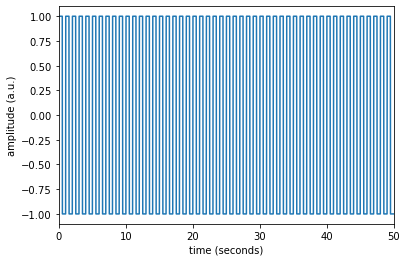

In [3]:
sq_wave = plt.figure()
plt.plot(time, amplitude)
plt.axis((0, 50, -1.1, 1.1))
plt.xlabel('time (seconds)')
plt.ylabel('amplitude (a.u.)');

Here's a zoomed-in view of the square wave showing the first few periods.

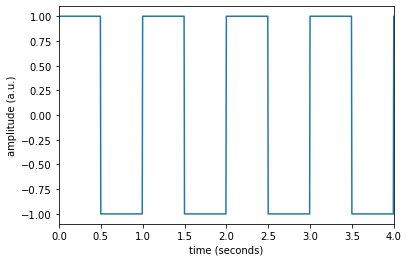

In [4]:
plt.plot(time, amplitude)
plt.axis((0, 4, -1.1, 1.1))
plt.xlabel('time (seconds)')
plt.ylabel('amplitude (a.u.)');

Compute the discrete Fourier Transform of the amplitude data using `fft()`.
The fft function outputs a vector of complex numbers.

In [5]:
from scipy.fft import fft, fftfreq

y = fft(amplitude)

The magnitude of the fft can be calculated by adding the squares of the
real and imaginary components (and then taking the square root).  The
tangent of the phase is determined by the ratio of the imaginary and real parts.
NumPy has built-in functions 'np.abs()' and 'np.angle()' that can be used
to calculate these quantities directly.

In [6]:
N     = len(y)
mag   = np.abs(y)
phase = np.angle(y)

We have to determine the appropriate frequency scale for the x-axis.  The
maximum frequency is set by the spacing between adjacent times.  The
frequency step, is set by `fmax / (number of points - 1)`.

In [7]:
fmax  = 1 / (time[1] - time[0])
fstep = fmax / (len(time) - 1)
fmax, fstep

(200.0, 0.020002000200020003)

Therefore the frequency axis is:

In [8]:
freq = np.arange(0, fmax + fstep, fstep)
freq = fftfreq(len(time), fmax)

Below, we plot the magnitude of the fourier transform.  

I don't know enough about fft to know why, but the magnitude that is output is the amplitude of the time signal multiplied by one half the number of points.

To get just the amplitude, I will divide the magnitude by `N/2` before plotting.

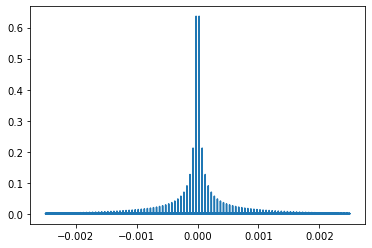

In [13]:
fft_mag = plt.figure()
plt.plot(freq, (mag / (len(time))));

Here's a zoomed-in view of the fft magnitude.

Notice that the fft shows nonzero frequency components only at the odd
harmonics of the fundamental frequency (1 Hz).  
Also, the amplitudes (after removing the N/2 contribution) are correct.

One expects the height of the fundamental frequency component of a square wave of amplitude 1 to be 4/pi = 1.27. 

The higher order harmonics should have heights equal 4/(pi*n) where n = 3, 5, 7, ...

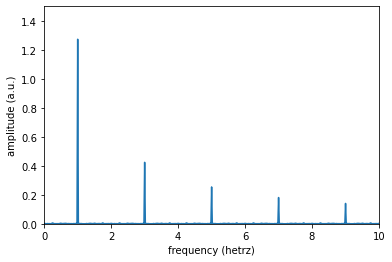

In [14]:
plt.plot(freq, mag/(len(time)/2));
plt.axis((0, 10, 0, 1.5))
plt.xlabel('frequency (hertz)')
plt.ylabel('amplitude (a.u.)');


We next verify that the inverse fourier transform 'ifft()' works as expected.
If we apply 'ifft()' to y, we should recover the original square wave.

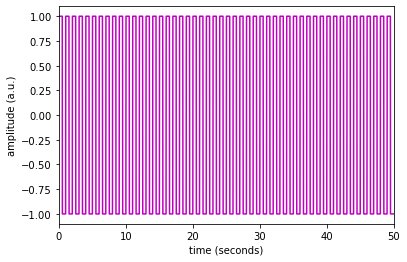

In [15]:
from scipy.fft import ifft
g = ifft(y)
plt.figure()
plt.plot(time, np.real(g), 'm-')
plt.axis((0, 50, -1.1, 1.1))
plt.xlabel('time (seconds)')
plt.ylabel('amplitude (a.u.)');

All of this works well when using artificial (i.e. noiseless) data.  In
this last example, we'll import some data from the PHYS 232 thermal waves
experiment and apply the fft routine.  The data file that we'll work with
is called "fftdata.dat".

In [16]:
PHYS232 = np.loadtxt('fftdata.dat')
time = PHYS232[:, 0]
amplitude = PHYS232[:, 1]

Plot the imported data

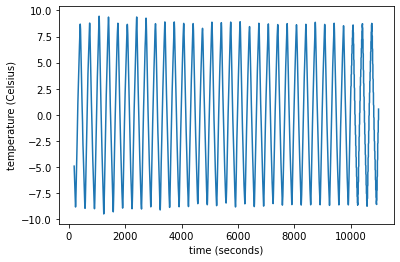

In [17]:
plt.plot(time,amplitude)
plt.xlabel('time (seconds)')
plt.ylabel('temperature (Celsius)');

Compute the discrete Fourier Transform of the amplitude data using 'fft()'.
The fft function outputs a vector of complex numbers.

In [18]:
y = fft(amplitude)
m = abs(y)

In [19]:
fmax = 1/(time[1]-time[0])
fstep = fmax/len(time)
fmax, fstep

(1.0, 9.264406151565684e-05)

In [20]:
freq = np.arange(0, fmax, fstep)

Below, we plot the magnitude of the fourier transform.  

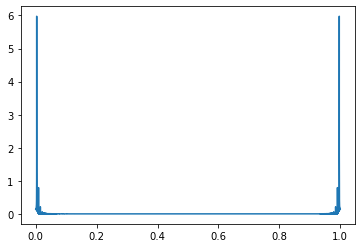

In [21]:
fft_magExp = plt.figure()
plt.plot(freq, m/(len(time)/2));

Here's a zoomed-in view of the fft magnitude.
The fundamental frequency of this data is 0.003 Hz with peaks at the odd
harmonics (0.009 and 0.015 Hz).

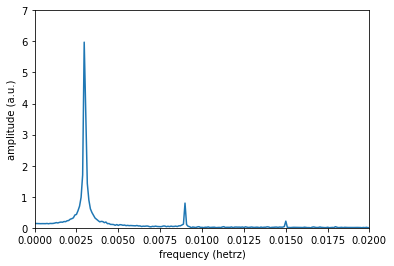

In [22]:
plt.plot(freq, m/(len(time)/2))
plt.axis((0, 0.02, 0, 7))
plt.xlabel('frequency (hetrz)')
plt.ylabel('amplitude (a.u.)');